In [3]:
import pandas as pd
import numpy as np 
# Load the full dataset
df = pd.read_csv("C:/Users/manor/Downloads/Walmart_Sales.csv")

# Drop the specified columns
columns_to_drop = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', "Store"]
df_cleaned = df.drop(columns=columns_to_drop)

# Preview the cleaned DataFrame
print(df_cleaned.head())


         Date  Weekly_Sales
0  05-02-2010    1643690.90
1  12-02-2010    1641957.44
2  19-02-2010    1611968.17
3  26-02-2010    1409727.59
4  05-03-2010    1554806.68


In [5]:
# Count missing values in each column
missing_counts = df_cleaned.isnull().sum()

# Display columns with missing values
missing_counts = missing_counts[missing_counts > 0]
print("Missing values per column:")
print(missing_counts)


Missing values per column:
Series([], dtype: int64)


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.7+ KB


In [11]:
# Ensure 'Date' is datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'],format='%d-%m-%Y')

# Sort by date
df_cleaned = df_cleaned.sort_values('Date')

# Aggregate weekly sales (if needed)
ts = df_cleaned.groupby('Date')['Weekly_Sales'].sum()


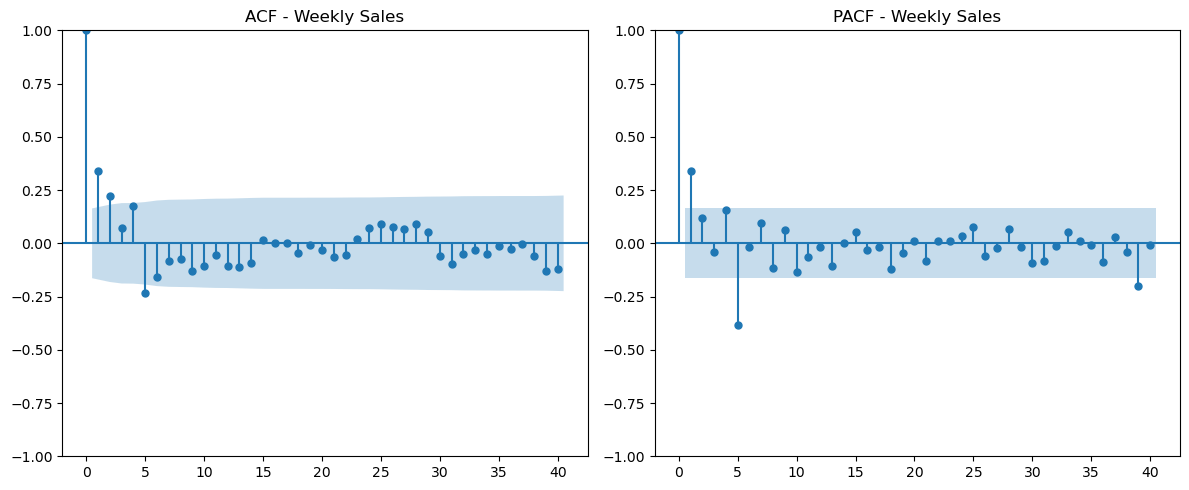

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(ts, lags=40, ax=plt.gca())
plt.title('ACF - Weekly Sales')

plt.subplot(1, 2, 2)
plot_pacf(ts, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF - Weekly Sales')

plt.tight_layout()
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller
# Aggregate weekly sales by date
ts = df_cleaned.groupby('Date')['Weekly_Sales'].sum()
# Run ADF test
adf_result = adfuller(ts)

# Display results
print("ADF Test Results:")
print(f"ADF Statistic      : {adf_result[0]}")
print(f"p-value            : {adf_result[1]}")
print(f"# Lags Used        : {adf_result[2]}")
print(f"# Observations     : {adf_result[3]}")
print("Critical Values    :")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

# Interpretation
if adf_result[1] < 0.05:
    print("✅ The time series is likely stationary (reject H0).")
else:
    print("⚠️ The time series is likely non-stationary (fail to reject H0).")


ADF Test Results:
ADF Statistic      : -5.908297957186333
p-value            : 2.675979158986027e-07
# Lags Used        : 4
# Observations     : 138
Critical Values    :
   1%: -3.4786
   5%: -2.8827
   10%: -2.5781
✅ The time series is likely stationary (reject H0).


In [60]:
from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA(0,1,5)
model = ARIMA(ts, order=(0, 1, 5))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(0, 1, 5)   Log Likelihood               -2397.188
Date:                Sun, 27 Jul 2025   AIC                           4806.376
Time:                        00:08:10   BIC                           4824.111
Sample:                    02-05-2010   HQIC                          4813.583
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4449      0.039    -11.373      0.000      -0.522      -0.368
ma.L2         -0.1524      0.055     -2.748      0.006      -0.261      -0.044
ma.L3         -0.1889      0.060     -3.160      0.0

C:\Users\manor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\manor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\manor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\manor\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


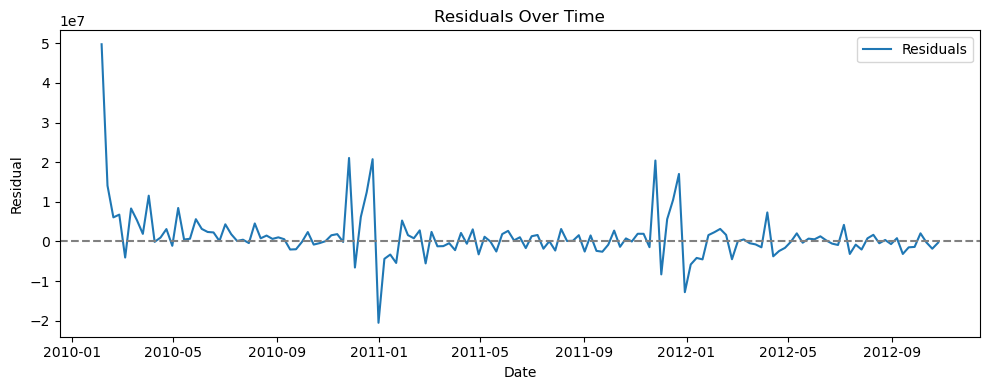

In [61]:
# Extract residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.tight_layout()
plt.show()


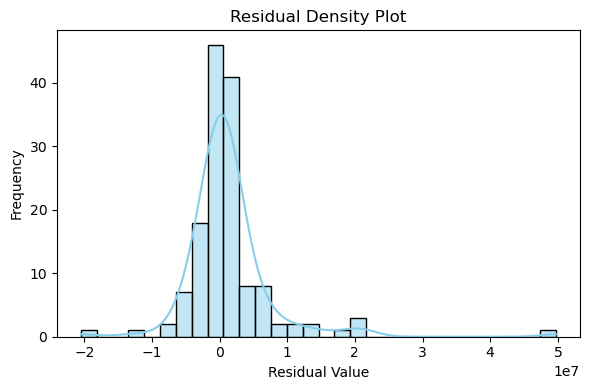

In [63]:
import seaborn as sns
# Plot density of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Residual Density Plot')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


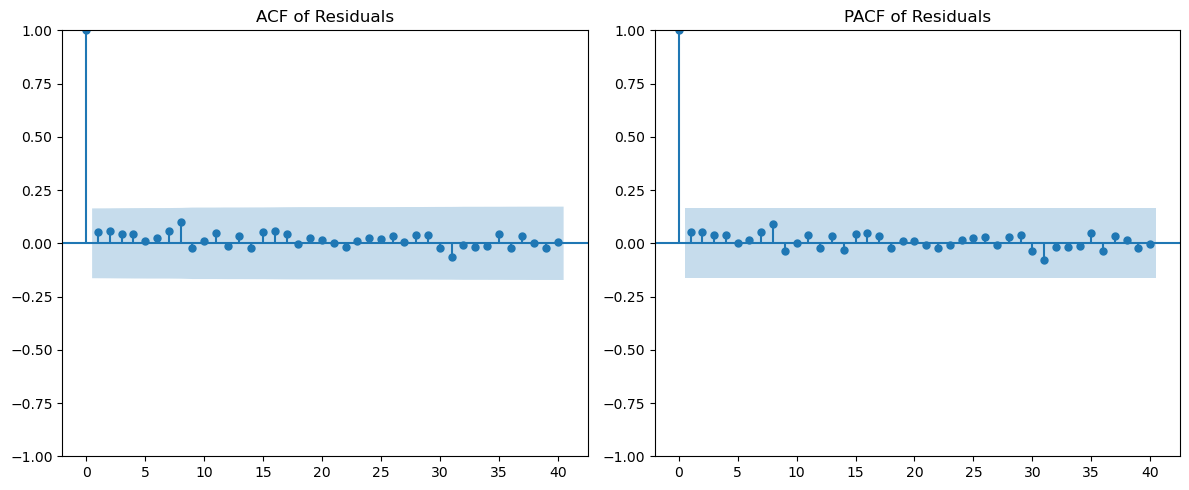

In [65]:
# Residuals from ARIMA model
residuals = model_fit.resid

# Plot ACF and PACF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()


In [66]:
# Forecast next 12 time steps
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Display forecasted values
print("Forecasted Weekly Sales:")
print(forecast)


Forecasted Weekly Sales:
2012-11-02    4.676913e+07
2012-11-09    4.645732e+07
2012-11-16    4.628363e+07
2012-11-23    4.682355e+07
2012-11-30    4.691509e+07
2012-12-07    4.691509e+07
2012-12-14    4.691509e+07
2012-12-21    4.691509e+07
2012-12-28    4.691509e+07
2013-01-04    4.691509e+07
2013-01-11    4.691509e+07
2013-01-18    4.691509e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64


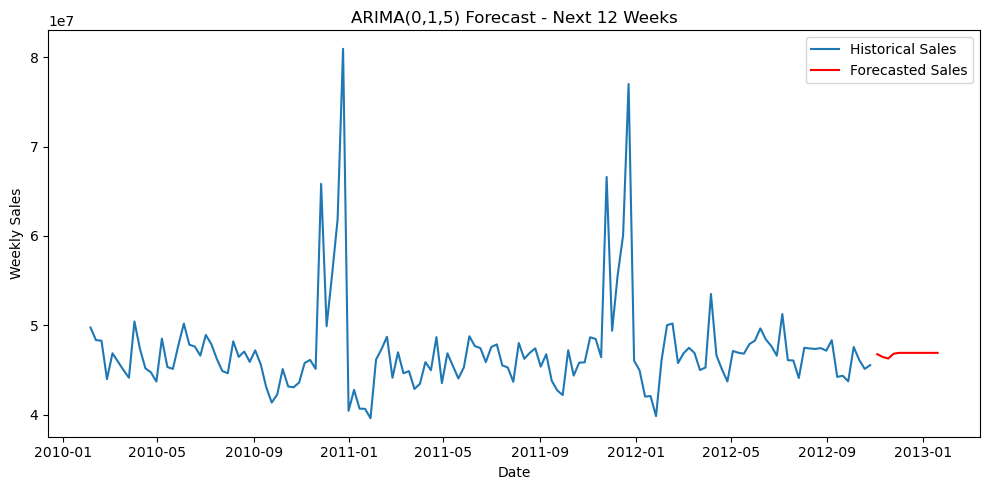

In [68]:
# Plot historical data
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Historical Sales')

# Plot forecast
forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')

plt.title('ARIMA(0,1,5) Forecast - Next 12 Weeks')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()
